### Importing the necessary packages

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

### Importing the Dataset

In [44]:
data = pd.read_csv('C:/Users/Sowmya Ganesh/Documents/Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [45]:
#In the Taxable income column we are Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".
data['Taxable.Income']=data['Taxable.Income'].apply(lambda x:'Risky' if x<=30000 else 'Good')

In [46]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [47]:
#Converting YES and NO to 1 and 0 using mapping
data['Undergrad'] = data['Undergrad'].map({'YES':1,'NO':0}) 
data['Urban'] = data['Urban'].map({'YES':1,'NO':0}) 

In [48]:
data1=data.copy()

In [51]:
#Using get_dummies creating a new column for each category and assigns a value of 1 and 0 to the rows that belong to that category.
dummies1 = pd.get_dummies(data1['Taxable.Income'])
dummies2 = pd.get_dummies(data1['Marital.Status'])
data1 = pd.concat([data,dummies1,dummies2],axis=1)

In [86]:
## Dropping the unwanted columns like Marital.status and Taxable.Income
Fraud_data = data.drop('Marital.Status',axis=1)
Fraud_data = Fraud_data.drop('Taxable.Income',axis=1)

In [87]:
Fraud_data

,Undergrad,City.Population,Work.Experience,Urban,Good,Risky,Divorced,Married,Single
0,0,50047,10,1,True,False,False,False,True
1,1,134075,18,1,True,False,True,False,False
2,0,160205,30,1,True,False,False,True,False
3,1,193264,15,1,True,False,False,False,True
4,0,27533,28,0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
595,1,39492,7,1,True,False,True,False,False
596,1,55369,2,1,True,False,True,False,False
597,0,154058,0,1,True,False,True,False,False
598,1,180083,17,0,True,False,False,True,False


In [88]:
#Since the columns have True and False,Converting it to 0 and 1.
Fraud_data['Good'] = Fraud_data['Good'].astype(bool).astype(int)
Fraud_data['Risky'] = Fraud_data['Risky'].astype(bool).astype(int)
Fraud_data['Divorced'] = Fraud_data['Divorced'].astype(bool).astype(int)
Fraud_data['Married'] = Fraud_data['Married'].astype(bool).astype(int)
Fraud_data['Single'] = Fraud_data['Single'].astype(bool).astype(int)

In [89]:
Fraud_data

,Undergrad,City.Population,Work.Experience,Urban,Good,Risky,Divorced,Married,Single
0,0,50047,10,1,1,0,0,0,1
1,1,134075,18,1,1,0,1,0,0
2,0,160205,30,1,1,0,0,1,0
3,1,193264,15,1,1,0,0,0,1
4,0,27533,28,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,1,0,0
596,1,55369,2,1,1,0,1,0,0
597,0,154058,0,1,1,0,1,0,0
598,1,180083,17,0,1,0,0,1,0


In [90]:
Fraud_data.columns

Index(['Undergrad', 'City.Population', 'Work.Experience', 'Urban', 'Good',
       'Risky', 'Divorced', 'Married', 'Single'],
      dtype='object')

In [91]:
Fraud_data.dtypes

Undergrad          int64
City.Population    int64
Work.Experience    int64
Urban              int64
Good               int32
Risky              int32
Divorced           int32
Married            int32
Single             int32
dtype: object

### Exploratory Data Analysis(EDA)

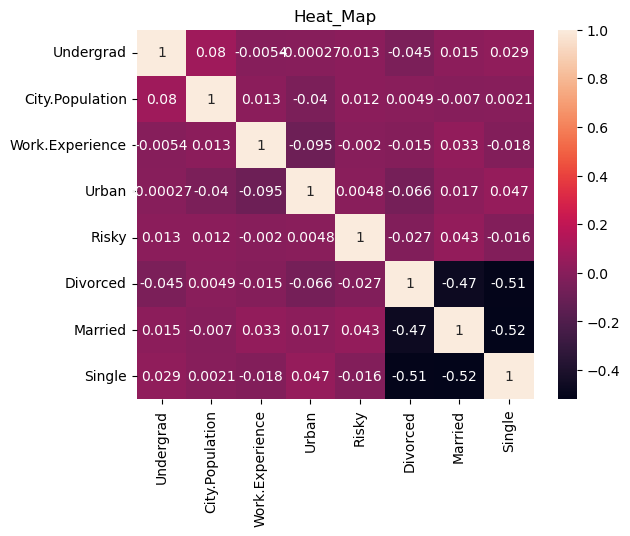

In [105]:
path = 'C:/Users/Sowmya Ganesh/Documents/Fraud_Data_Graphs'
file_path = os.path.join(path,'Heatmap.png')
corr = Fraud_data[['Undergrad','City.Population', 'Work.Experience',
       'Urban','Risky', 'Divorced', 'Married', 'Single']].corr()
sns.heatmap(corr,annot=True)
plt.title('Heat_Map')
plt.savefig(file_path)
plt.show()

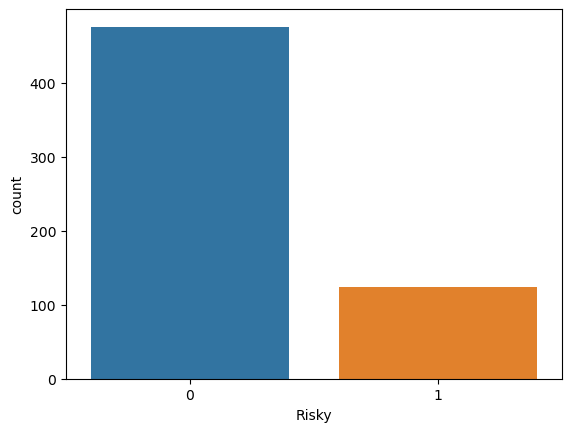

In [106]:
path = 'C:/Users/Sowmya Ganesh/Documents/Fraud_Data_Graphs'
file_path = os.path.join(path,'Countplot.png')
sns.countplot(x='Risky',data = Fraud_data)
plt.savefig(file_path)
plt.show()

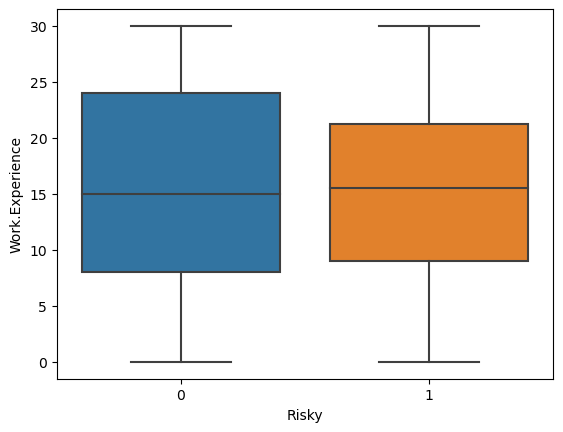

In [107]:
path = 'C:/Users/Sowmya Ganesh/Documents/Fraud_Data_Graphs'
file_path = os.path.join(path,'Boxplot1.png')
plt.savefig(file_path)  
sns.boxplot(x='Risky',y='Work.Experience',data=Fraud_data)
plt.show()

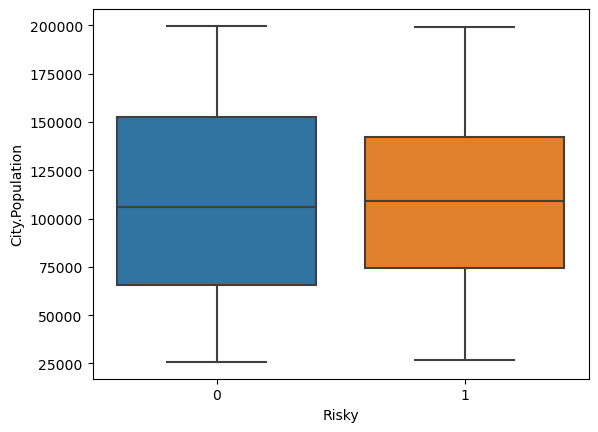

In [108]:
path = 'C:/Users/Sowmya Ganesh/Documents/Fraud_Data_Graphs'
file_path = os.path.join(path,'Boxplot2.png')
plt.savefig(file_path)  
sns.boxplot(x='Risky',y='City.Population',data=Fraud_data)
plt.show()

In [109]:
#Checking for nill values
null_values=Fraud_data.isnull().sum()
print(null_values)

Undergrad          0
City.Population    0
Work.Experience    0
Urban              0
Good               0
Risky              0
Divorced           0
Married            0
Single             0
dtype: int64


In [ ]:
#  No null values found
#  No outliers found
#  Since we have all the DataColumns in required form, we are using the Decision tree model to check the Fraud.

In [113]:
#Saving the Modified data
path='C:/Users/Sowmya Ganesh/Documents/Fraud_Check_modified_data.csv'
Fraud_data.to_csv(path,index=False)
